# Analyse en Composantes Principales (ACP)

### Objectif du cours

- Comprendre les étapes d’une ACP (normalisation, valeurs propres, inertie).

- Produire les visualisations clés :

    ✔ Eboulis
    
    ✔ Cercle des corrélations
    
    ✔ Carte des individus
    

- Interpréter les axes et la structure des données.

## 1. Importation et standardisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger les données
df = pd.read_csv("USArrests.csv", index_col=0)

# Standardiser les données
X = StandardScaler().fit_transform(df)

In [3]:
display(df)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## 2. ACP avec scikit-learn

In [5]:
# ACP
pca = PCA()
pca.fit(X)

# Coordonnées principales
coords = pca.transform(X)
display(coords)

array([[ 9.85565885e-01, -1.13339238e+00, -4.44268788e-01,
        -1.56267145e-01],
       [ 1.95013775e+00, -1.07321326e+00,  2.04000333e+00,
         4.38583440e-01],
       [ 1.76316354e+00,  7.45956781e-01,  5.47808243e-02,
         8.34652924e-01],
       [-1.41420290e-01, -1.11979678e+00,  1.14573692e-01,
         1.82810896e-01],
       [ 2.52398013e+00,  1.54293399e+00,  5.98556799e-01,
         3.41996478e-01],
       [ 1.51456286e+00,  9.87555085e-01,  1.09500699e+00,
        -1.46488703e-03],
       [-1.35864746e+00,  1.08892789e+00, -6.43257569e-01,
         1.18469414e-01],
       [ 4.77093091e-02,  3.25358925e-01, -7.18632942e-01,
         8.81977637e-01],
       [ 3.01304227e+00, -3.92285133e-02, -5.76829492e-01,
         9.62847520e-02],
       [ 1.63928304e+00, -1.27894240e+00, -3.42460080e-01,
        -1.07679681e+00],
       [-9.12657146e-01,  1.57046001e+00,  5.07818939e-02,
        -9.02806864e-01],
       [-1.63979985e+00, -2.10972917e-01,  2.59801342e-01,
      

## 3. Éboulis des valeurs propres

Variance individuelle (%): [62.006 24.744  8.914  4.336]
Variance cumulée (%):     [ 62.006  86.75   95.664 100.   ]


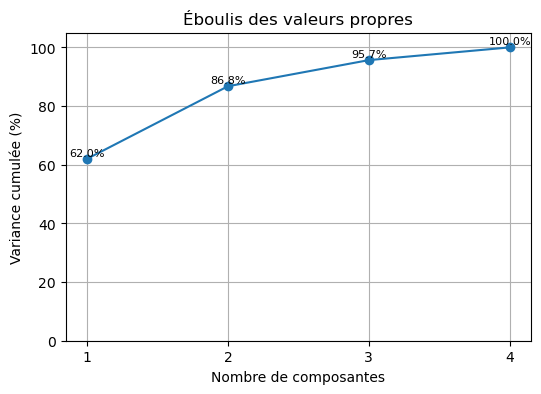

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Calculer la variance expliquée et la variance cumulée
ratio = pca.explained_variance_ratio_ * 100        # % par composante
cum = np.cumsum(ratio)                             # variance cumulée

# Vérification rapide (affiche les valeurs)
print("Variance individuelle (%):", np.round(ratio, 3))
print("Variance cumulée (%):    ", np.round(cum, 3))

# Graphe d'éboulis correct et robuste
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cum)+1), cum, marker='o')
plt.xticks(range(1, len(cum)+1))
for i, v in enumerate(cum, start=1):
    plt.text(i, v+1.0, f"{v:.1f}%", ha='center', fontsize=8)  # annoter les points

plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée (%)")
plt.title("Éboulis des valeurs propres")
plt.ylim(0, 105)
plt.grid(True)
plt.show()

## 4. Cercle des corrélations

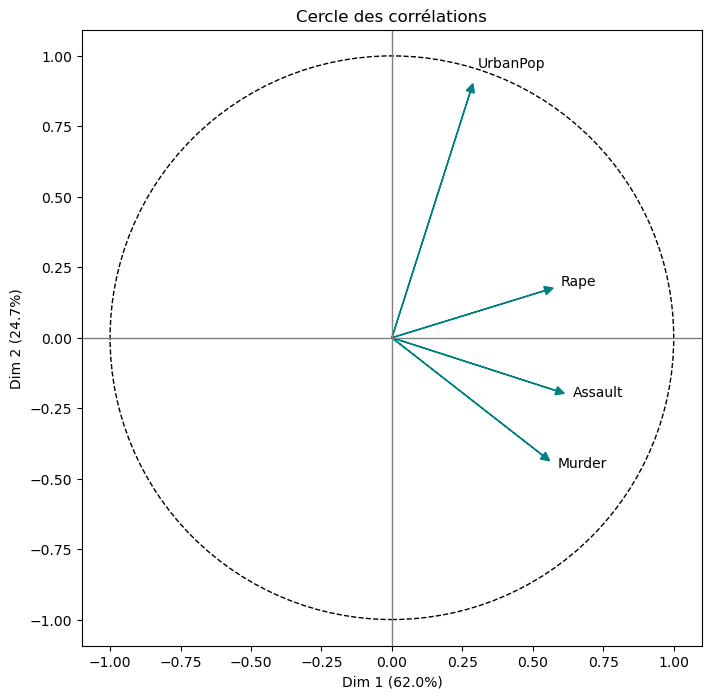

In [7]:
# Coordonnées des variables
pcs = pca.components_

plt.figure(figsize=(8,8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

for i in range(len(df.columns)):
    plt.arrow(0,0, pcs[0,i], pcs[1,i], 
              head_width=0.03, head_length=0.03, color='teal')
    plt.text(pcs[0,i]*1.1, pcs[1,i]*1.1, df.columns[i])

circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='black', linestyle='--')
plt.gca().add_patch(circle)

plt.xlabel(f"Dim 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"Dim 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Cercle des corrélations")
plt.axis("equal")
plt.show()

## 5. Carte des individus

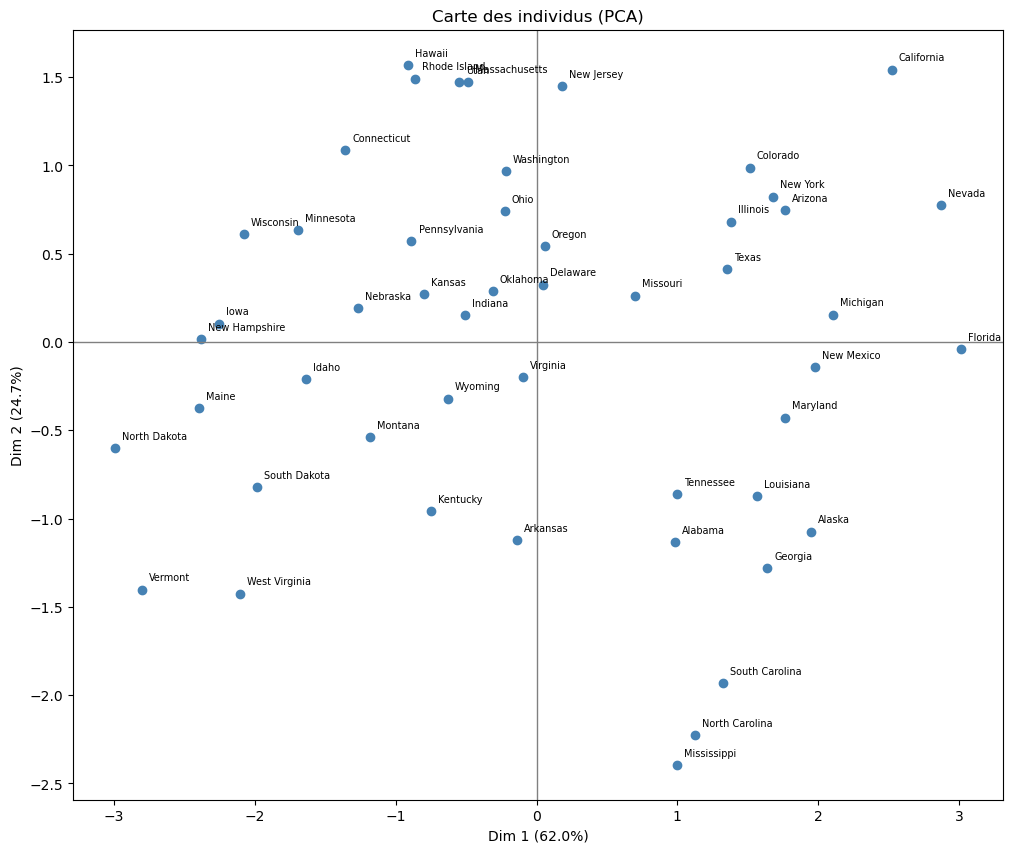

In [17]:
plt.figure(figsize=(12,10))
plt.scatter(coords[:,0], coords[:,1], color='steelblue')

for i, label in enumerate(df.index):
    plt.text(coords[i,0]+0.05, coords[i,1]+0.05, label, fontsize=7)

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

plt.xlabel(f"Dim 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"Dim 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Carte des individus (PCA)")
plt.show() 

### **📝 EXERCICES**

**Exercice 1 — Standardisation**

**1.** Pourquoi doit-on standardiser les données avant une ACP ?

**2.** Quel serait le risque si on ne le fait pas ?

✔️ Correction Exercice 1

1. Parce que les variables n’ont pas la même échelle.

2. Une variable grande échelle écrase les autres (ex : Assault).

**Exercice 2 — Éboulis**

**1.** Quelle proportion de variance est expliquée par les deux premiers axes ?

**2.** Combien d’axes faut-il retenir et pourquoi ?

✔️ *Correction Exercice 2*

1.  **Dim1** ≈ 69%
    **Dim2** ≈ 19%
    **Total** ≈ 88%
    
2. On retient 2 axes → 88% d’info.

**Exercice 3 — Cercle des corrélations**

**1.** Quelle variable contribue le plus à Dim 1 ?

**2.** Quelle variable est la plus corrélée à Dim 2 ?

**3.** Interpréter la position de UrbanPop sur le cercle.

*✔️ Correction Exercice 3*

**1. Assault** (plus grande flèche sur Dim1).

**2. UrbanPop** (flèche alignée sur Dim2).

**3. Variable** très corrélée à Dim2 → structure démographique/non criminelle.

**Exercice 4 — Carte des individus**

**1.** Quelles sont les 3 États les plus extrêmes sur l’axe 1 ?

**2.** Pourquoi sont-ils à ces positions ?

✔️ *Correction Exercice 4*

1. Exemples : California, Florida, Nevada → extrêmes en criminalité.

2. Ils combinent Murder + Assault élevés → position logique sur l’axe 1.

## A. Interprétation de l’Axe 1 (PC1) — “Criminalité générale”

Sur le cercle de correlation :

- Murder → fortement positif sur Dim1

- Assault → fortement positif sur Dim1

- Rape → fortement positif sur Dim1

Donc :

- **L'axe 1 mesure le niveau général de violence/criminalité.**

Plus un État a des valeurs élevées en Murder, Assault, Rape

➡ plus il se trouve à droite du graphique.

Exemples dans la carte PCA :

- Florida, California, Nevada → très à droite → **États plus violents**

- Vermont, North Dakota, Iowa → très à gauche → **États très sûrs**

Donc DIM1 = **échelle de dangerosité / criminalité violente.**

## B. Interprétation de l’Axe 2 (PC2) — “Urbanisation vs. Ruralité”

Sur le cercle des corrélations :

- UrbanPop → très fortement négatif sur Dim2

- Murder/Assault → faiblement positifs

- Rape → faiblement négatif

Donc Dim2 mesure un autre phénomène :

👉 **La dimension “Urbaine vs Non-urbaine”**

- En haut → **États moins urbains (plutôt ruraux)**

- En bas → **États très urbains**

Et c’est là que la question arrive :

## *❓ Pourquoi UrbanPop est dans le négatif ?*

Parce que :

En ACP, un axe peut être retourné sans changer l’analyse.
Le programme a simplement choisi une direction où UrbanPop est en négatif.

Mais le sens reste logique :

- UrbanPop très négatif → **États très urbains** en bas du graphique

- UrbanPop proche de 0 → **États intermédiaires**

- UrbanPop positif → **États peu urbains** 

Ce n’est **pas** que l’urbanisation est “négative”.
C’est juste un **choix d’orientation géométrique** de l’axe 2.

### Comment lire l’opposition “urbain vs rural” sur Dim2 ?

Les individus :

- **Hawaii, New Jersey, Rhode Island, Massachusetts**
    - → en bas du graphique
    - → très urbanisés → cohérent : UrbanPop est en négatif → ces points sont en bas

- Mississippi, North Carolina, South Dakota
    - → en haut du graphique
    - → États moins urbains → cohérent

Donc même si UrbanPop est “dans le négatif”,

    → il représente bien l'urbanisation, mais projetée du côté négatif de l’axe 2.

## C. Résumé

- **L’axe 1 (62%) représente la criminalité générale.**
Murder, Assault et Rape contribuent fortement dans la même direction.
Les États situés à droite sont ceux où les niveaux de violence sont les plus élevés
(Californie, Nevada, Floride), tandis que ceux de gauche sont les plus sûrs
(Vermont, Dakota du Nord).

- **L’axe 2 (24%) oppose les États urbains aux États ruraux.**
La variable UrbanPop est fortement corrélée à Dim 2, mais dans le sens négatif :
cela signifie simplement que le programme a orienté l’axe vers le bas pour les régions urbaines.
Les États très urbanisés se trouvent donc dans la partie basse du graphique
(Massachusetts, New Jersey, Hawaii),
tandis que les États plus ruraux apparaissent en haut
(Mississippi, South Dakota).

In [9]:
import pandas as pd

# pca.components_ → matrice (n_components x n_variables)

components_df = pd.DataFrame(
    pca.components_,
    columns=df.columns,                  # noms des variables
    index=[f"Dim{i+1}" for i in range(len(pca.components_))]   # noms des axes
)

print(components_df.iloc[:2, :])


        Murder   Assault  UrbanPop      Rape
Dim1  0.535899  0.583184  0.278191  0.543432
Dim2 -0.418181 -0.187986  0.872806  0.167319


**Le signe des axes en ACP est arbitraire : seule l’opposition compte, pas la direction choisie.**

## 6. Contributions des variables

In [10]:
import pandas as pd

# 1) Loadings (coordonnées des variables sur les axes PCA)
pcs = pca.components_

# 2) Contributions = carré des loadings × 100
contrib = (pcs**2) 

# 3) DataFrame propre : variables en lignes, dimensions en colonnes
contrib_df = pd.DataFrame(
    contrib.T,
    index=df.columns,
    columns=[f"Dim{i+1}" for i in range(pcs.shape[0])]
)

# 4) Afficher les contributions des deux premières dimensions
print("Contributions des variables :")
print(contrib_df.iloc[:, :2])





#########################################le calcule de contibution des axes factoriel################################ 

Contributions des variables :
              Dim1      Dim2
Murder    0.287188  0.174875
Assault   0.340103  0.035339
UrbanPop  0.077390  0.761791
Rape      0.295318  0.027996


## 7. Qualité de représentation COS²

In [11]:
import pandas as pd

# 1) Loadings (coordonnées des variables sur les axes PCA)
pcs = pca.components_

# 2) cos² = carré des loadings
cos2 = pcs**2

# 3) DataFrame propre : variables en lignes, dimensions en colonnes
cos2_df = pd.DataFrame(
    cos2.T,
    index=df.columns,
    columns=[f"Dim{i+1}" for i in range(pcs.shape[0])]
)

# 4) Afficher les cos² des deux premières dimensions
print("Cos² des variables :")
print(cos2_df.iloc[:, :2])


Cos² des variables :
              Dim1      Dim2
Murder    0.287188  0.174875
Assault   0.340103  0.035339
UrbanPop  0.077390  0.761791
Rape      0.295318  0.027996


In [12]:
# coords = pca.transform(X)  # déjà calculé avant

# COS² pour les individus = (coordonnées²) / (distance totale dans l'espace PCA)
cos2_ind = (coords**2) / np.sum(coords**2, axis=1).reshape(-1,1)

cos2_ind_df = pd.DataFrame(
    cos2_ind,
    columns=[f"Dim{i+1}" for i in range(coords.shape[1])],
    index=df.index
)

print("COS² des individus :")
print(cos2_ind_df.iloc[:, :2])   # Dim 1 et Dim 2

COS² des individus :
                    Dim1      Dim2
Alabama         0.392031  0.518453
Alaska          0.408542  0.123731
Arizona         0.712224  0.127485
Arkansas        0.015146  0.949605
California      0.690465  0.258027
Colorado        0.513383  0.218268
Connecticut     0.533581  0.342756
Delaware        0.001623  0.075481
Florida         0.963538  0.000163
Georgia         0.479890  0.292103
Hawaii          0.202322  0.599074
Idaho           0.881605  0.014593
Illinois        0.669460  0.163689
Indiana         0.500166  0.044970
Iowa            0.992532  0.002116
Kansas          0.845225  0.097150
Kentucky        0.291688  0.475261
Louisiana       0.607907  0.188365
Maine           0.957468  0.023612
Maryland        0.856687  0.050388
Massachusetts   0.083986  0.772549
Michigan        0.960514  0.005218
Minnesota       0.870109  0.121399
Mississippi     0.135684  0.782983
Missouri        0.648796  0.092681
Montana         0.794044  0.162863
Nebraska        0.958877  0.022519

**« En ACP, les coordonnées au carré nous donnent deux choses :
le cos² (qualité de projection) et la contribution (importance).
Dans sklearn, les axes sont normalisés, donc la somme des carrés vaut 1.
C’est pour cela que pcs²×100 et la formule normalisée donnent les mêmes résultats**

### 1. Filtrer les individus avec COS² > 0.70 sur l’axe 1

In [13]:
filtre_dim1 = cos2_ind_df[cos2_ind_df["Dim1"] > 0.70]
print("Individus bien représentés sur Dim1 (COS² > 0.70) :")
print(filtre_dim1)

Individus bien représentés sur Dim1 (COS² > 0.70) :
                   Dim1      Dim2      Dim3      Dim4
Arizona        0.712224  0.127485  0.000688  0.159604
Florida        0.963538  0.000163  0.035315  0.000984
Idaho          0.881605  0.014593  0.022130  0.081672
Iowa           0.992532  0.002116  0.005292  0.000060
Kansas         0.845225  0.097150  0.000869  0.056756
Maine          0.957468  0.023612  0.000719  0.018201
Maryland       0.856687  0.050388  0.006813  0.086113
Michigan       0.960514  0.005218  0.032004  0.002264
Minnesota      0.870109  0.121399  0.007116  0.001376
Montana        0.794044  0.162863  0.034441  0.008652
Nebraska       0.958877  0.022519  0.018453  0.000151
Nevada         0.800900  0.058312  0.131199  0.009589
New Hampshire  0.999510  0.000058  0.000239  0.000193
New Mexico     0.958573  0.004989  0.008250  0.028187
New York       0.721764  0.172758  0.105431  0.000046
North Dakota   0.945686  0.037913  0.009587  0.006814
South Dakota   0.824431  0.141

### 2. Filtrer les individus avec COS² > 0.70 sur l’axe 2

In [14]:
filtre_dim2 = cos2_ind_df[cos2_ind_df["Dim2"] > 0.70]
print("Individus bien représentés sur Dim2 (COS² > 0.70) :")
print(filtre_dim2)

Individus bien représentés sur Dim2 (COS² > 0.70) :
                   Dim1      Dim2      Dim3      Dim4
Arkansas       0.015146  0.949605  0.009941  0.025309
Massachusetts  0.083986  0.772549  0.132003  0.011462
Mississippi    0.135684  0.782983  0.074988  0.006346
New Jersey     0.011868  0.756417  0.210389  0.021326
Utah           0.118338  0.845335  0.033682  0.002645


### 3. Filtre combiné : Dim 1 OU Dim 2 > 0.70

In [15]:
filtre_1_ou_2 = cos2_ind_df[(cos2_ind_df["Dim1"] > 0.50) & 
                            (cos2_ind_df["Dim2"] > 0.50)]
print("Individus bien représentés sur Dim1 et Dim2 :")
print(filtre_1_ou_2)

Individus bien représentés sur Dim1 et Dim2 :
Empty DataFrame
Columns: [Dim1, Dim2, Dim3, Dim4]
Index: []


### Bonus : Filtre combiné Dim1 + Dim2 > 0.70

In [16]:
filtre_2dims = cos2_ind_df[
    (cos2_ind_df["Dim1"] > 0.60) &
    (cos2_ind_df["Dim2"] > 0.60)
]

print("Individus très bien représentés sur Dim1 ET Dim2 (COS² > 0.60) :")
print(filtre_2dims)

Individus très bien représentés sur Dim1 ET Dim2 (COS² > 0.60) :
Empty DataFrame
Columns: [Dim1, Dim2, Dim3, Dim4]
Index: []


question 1:quelle apprenant  semble bien representer par dim1 (individue extraime) donneez leurs cos² et pourquoi ??
quelles sont les apprenant tres bien representer par dim 2 (cos²)
pourquois l'etudiant 33 a un cos elever sur dim 2 , que signifie 